# PCA 

### What PCA Actually Does

PCA reduces dimensionality by finding **n_components** directions (principal components) of greatest variance. These directions (vectors) are **linear combinations** of your original features, not individual m/z channels.

### Key Distinction

In your mass spec context:
- **Input features**: Individual m/z channels (e.g., m/z 100, 101, 102, etc.)
- **Principal components**: Weighted combinations of ALL m/z channels


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# X = np.load("../Data/LPS/LPS_LT_1-1660_x.npy")
# X = np.load("../Data/LPS/LPS_ST_1-1658_x.npy")
# X = np.load("../Data/LPS/SAL_LT_plasma_1-1658_x.npy")
X = np.load("../Data/LPS/SAL_ST_1-1657_x.npy")



print(X.shape)

(1634, 92500)


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split



X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Apply PCA
n_components = 500  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_scaled_train)
X_test_pca = pca.transform(X_scaled_test)

# Reconstruct train and test data from PCA
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

# Bring back to original scale
X_train_reconstructed_original = scaler.inverse_transform(X_train_reconstructed)
X_test_reconstructed_original = scaler.inverse_transform(X_test_reconstructed)

# Calculate reconstruction errors
train_mse = mean_squared_error(X_train, X_train_reconstructed)
test_mse = mean_squared_error(X_test, X_test_reconstructed)
train_mae = mean_absolute_error(X_train, X_train_reconstructed)
test_mae = mean_absolute_error(X_test, X_test_reconstructed)
train_rmse = root_mean_squared_error(X_train, X_train_reconstructed)
test_rmse = root_mean_squared_error(X_test, X_test_reconstructed)  



In [32]:
# print the training and test losses
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Training MSE: 0.27282572701694247
Test MSE: 0.011673554554999875
Training MAE: 0.12684701111791805
Test MAE: 0.04453708467270092
Training RMSE: 0.3408576997527533
Test RMSE: 0.06693868592744333


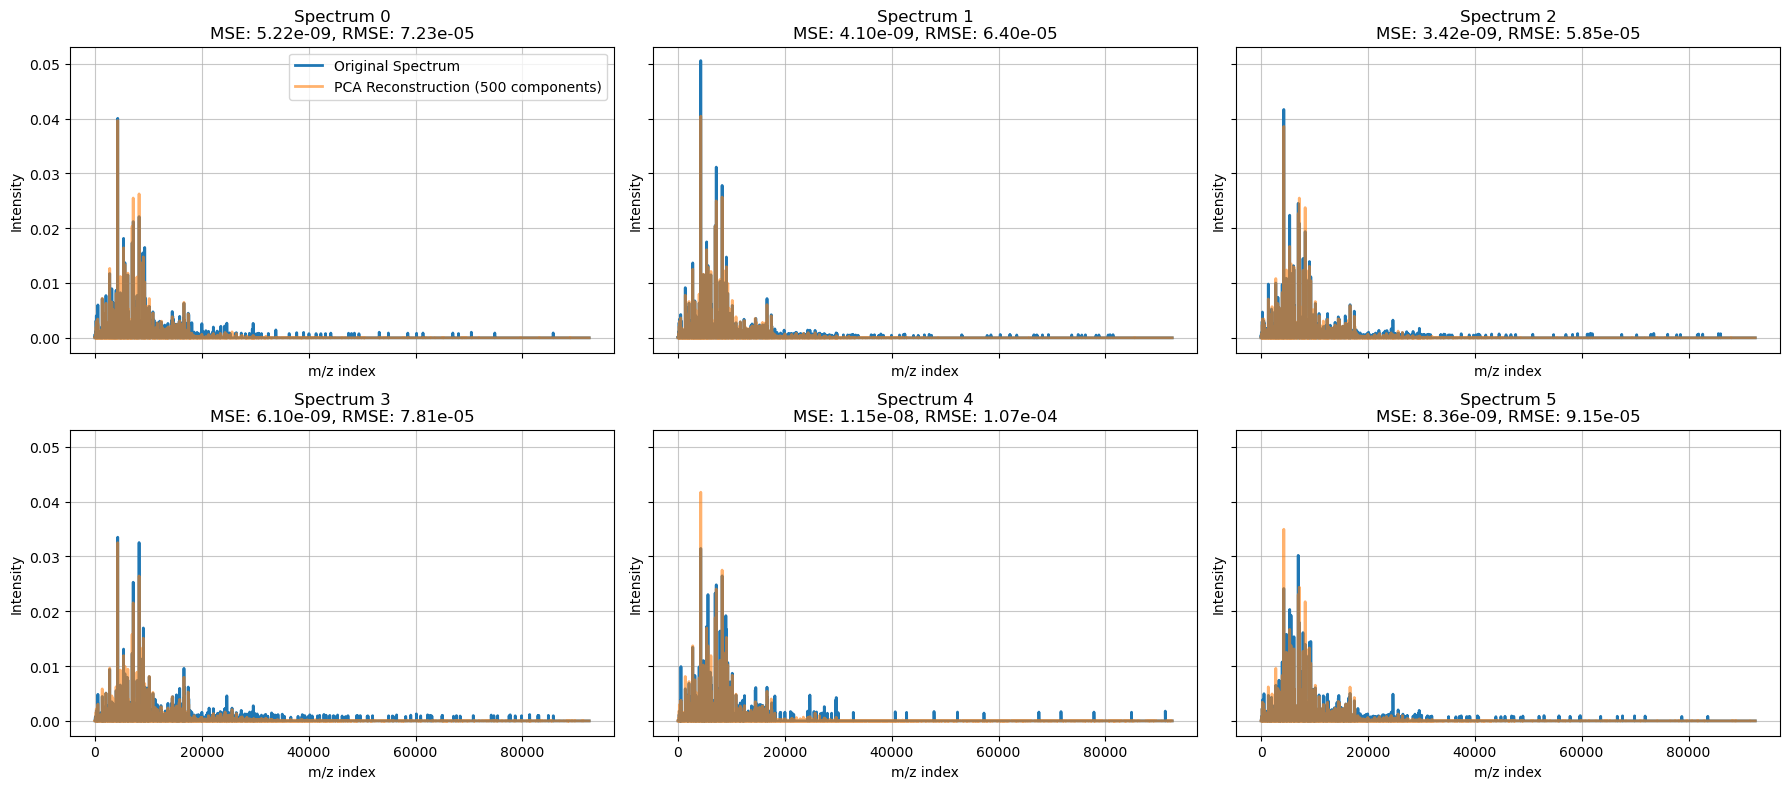

In [33]:
num_spectra = 6
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    orig = X_test[i]
    recon = X_test_reconstructed_original[i]
    mse = mean_squared_error(orig.reshape(1, -1), recon.reshape(1, -1))
    rmse = np.sqrt(mse)
    
    ax.plot(orig, label='Original Spectrum', linewidth=2)
    ax.plot(recon, label=f'PCA Reconstruction ({n_components} components)', linewidth=2, alpha=0.6)
    ax.set_title(f'Spectrum {i}\nMSE: {mse:.2e}, RMSE: {rmse:.2e}')
    ax.set_xlabel('m/z index')
    ax.set_ylabel('Intensity')
    ax.grid(True, alpha=0.7)
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()

In [34]:
# Print individual variance contribution of each PC
# print("Individual Principal Component Analysis:")
# print("=" * 50)

# for i in range(n_components):
#     var_ratio = pca.explained_variance_ratio_[i]
#     var_value = pca.explained_variance_[i]
#     print(f"PC{i+1}:")
#     print(f"  Explained Variance: {var_value:.6f}")
#     print(f"  Explained Variance Ratio: {var_ratio:.6f} ({var_ratio*100:.2f}%)")
#     print()

print(f"Total variance explained by {n_components} components: {pca.explained_variance_ratio_.sum():.6f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")


Total variance explained by 500 components: 0.570300 (57.03%)
